# KNN for Classification


# KNN - K nearest neighbor algorithm

It is a *Non-Parametric* and *Lazy algorithm*
 - **Non-Parametric** - No assumptions are made for underlying data, and model    structure is devloped entirely from data. Hence useful in real world problems as they dont follow any mathematical assumptions.
 - **Lazy** - It takes more time to scan all the point so the memory.
 
## How it Works -

1. It works on the simple principle of K number of nearest neighnors, When we feed data to train the model, each datapoint is plotted in space depending upon the features of data, this datapoints are classified into target categories.  <br> e.g. (Sugar Level, BMI, insulin level) are the features depending upon we find the target values which is (diabetes or No diabetes)

2. When we need prediction for our query we give data which again plotted in the space and now nearest data points are found by calculating the distance between them. and target value of those data point is also assigned to given query.

3. K is the number of nearest neighbors to be found, we find optimum value of K so model gives right predictions

4. If their are nearest neighbors from different categories decision made by majority of labels of datapoints.

5. Their are different methods of measuring distance in space like *Eclidean*, *Manhatten*
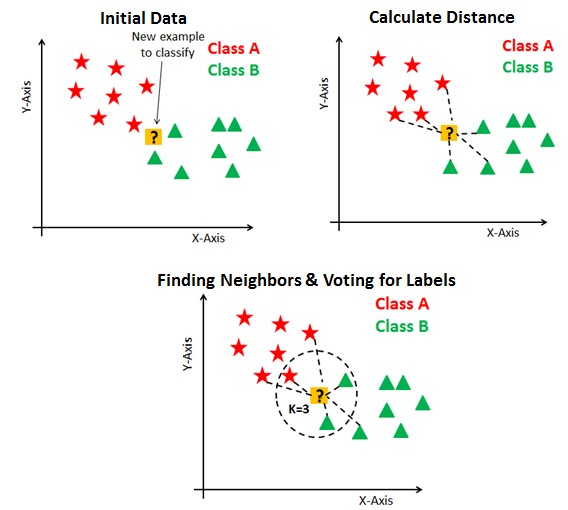

## Advantages
1. Simple algorithm to understand and interpret.
2. It is very useful for nonlinear data because there is no assumption about data in this algorithm.
3. Use for classification as well as regression.
4. It has relatively high accuracy but there are much better supervised learning models than KNN.

## Disadvantages
1. Space and time wise expensive as it store whole data used for training.
2. Sensitive to amount of data and features selected for data.

## Applications of KNN
1. Medical Fields
2. Banking System
3. Calculating Credit Ratings
4. Speech Recognition 
5. Handwriting Detection
6. Image Recognition
7. Video Recognition.

# KNN in Scikit-Learn

**Problem staement** - Lets say we are making a model that predicts wheather patient is having Diabetes or not, from the data given to train the model.

Data given -
It comprises of various factors that unfluences the diabetic conditions and it is collected for many people who are testing Positive or Negative for Diabetes.

Factors taken as *Features*- 
1. Pregnancies
2. Glucose
3. Blood Pressure 
4. Skin Thickness 
5. Insulin
6. BMI 
7. Diabetes Pedigree Function
8. Age


Target value is given in *Outcome* column in dataset

Target = (0 or 1)

**Solution by KNN**-
1. KNN Model plots this features in multidimensional spaces, hence data points are obtained for each patient, Now this data points are classified in to categories depending upon their *Target values* which is given in *Outcome* column in our dataset.
2. Model is formed by ploting the those datapoint and classifying them in to categories.
3. When new Query is made, i.e. we use model for prediction of Diabetes from unknown data, that unknown data is plotted in the space.
4. Distance between pair of each datapoint with Querried datapoint is measured and *K* nearest datapoints are found to be the nearest neighbors.
5. Now depending upon the majority of target values of nearest neibbhors target value is assigned to our Query.


## 1. Import required libraries for model making and model evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score, classification_report, confusion_matrix

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 2. Import the dataset

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Explore Dataset

 See if their is any ` NaN `field or ` blank ` field present in dataset, If yes then we need to process that data so that it won't influence the outcome adversaly. for doing so Use methods such as `df.dropna()` or df.replace()

In [3]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

## 4. Split dataset into feature and targets
1. Dataset is splitted into features & targets as X & y respectively
2. X has all the data except target value.
3. y has target values.

In [4]:
X = data.drop(["Outcome"], axis=1).values
X 

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
y = data["Outcome"].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

## 5. Split dataset into training and testing datasets


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)

## 6. Define the model

`class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

**Parameters**-

1. **`n_neighbors=5`**,  - [any int]
2. **`weights ='uniform'`**- [uniform, distance]
   1. unifrom - All neighburs have equal weightage
   2. distance - Weight is added to neighbors by inverse of their distance     hence closer neighbor have greater impact. 
3. **`algorithm ='auto'`** - ['auto', ‘ball_tree’, ‘kd_tree’, ‘brute’]
4. **`leaf_size = 30`** - [int] used for balltree, KD tree algorithms 
5. **`p = 2`** - Power paramter for minkowski metric
6. **`metric = 'minkowski'`**- ['euclidean', 'minkowski','manhatten', 'wminkowski','seuclidean','mahalanobis' ]
7. **`metric_params = None`** -Additional keyword arguments for the metric function.
8. **`n_jobs = None`** -[int]

**Attributes**-

1. **`classes_`** - 
Returns the classes of classifier
2. **`effective_metric_`** - 
Returns the distance metric used ('eucledian',minkowoski with p=2 etc)
3. **`effective_metric_params_`** -
4. **`n_samples_fit_`** - 
Returns number of samples in fitted data.
5. **`output_2d_`** -
False when y's shape is n_samples during fit otherwise True

**Methods**-

1. **`fit(X, y)`** -
2. **`get_params([deep])`**-	
Get parameters for this estimator.
3. **`kneighbors([X, n_neighbors, return_distance])`**-
4. **`kneighbors_graph([X, n_neighbors, mode])`**-
Computes the (weighted) graph of k-Neighbors for points in X
Finds the K-neighbors of a point.
5. **`predict(X)`**- 	
Predict the class labels for the provided data.
6. **`set_params(params)`**-
Set the parameters of this estimator.
7. **`score(X, y[, sample_weight])`**-	
Return the mean accuracy on the given test data and labels.
8. **`predict_proba(X)`** - 
Return probability estimates for the test data X.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')

## 7. Fit the model for Training dataset
Fit the data to Model 

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

## 8. Predict results for test datsets
Predict the Results for testset with predict method

In [10]:
y_pred = knn.predict(X_test)

## 9. Evaluate model based on true values of test data and predicted values of test data

Accuracy, Precision, f1_score, clssification report and confusion matrix are formed for the model prediction and model performance is evaluated.

In [11]:
acc = accuracy_score(y_test,y_pred)
acc

0.7077922077922078

In [12]:
precision_score(y_test,y_pred)

0.5961538461538461

In [13]:
f1_score(y_test,y_pred)

0.5794392523364486

In [14]:
y_pred = knn.predict(X_test)

In [15]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154



In [16]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[78 21]
 [24 31]]


## 10. Hyperparameter tuning for obtaning better results
By giving the random parameters to the KNeighborsClassifiers causes model to perform badly,So we find the optimum values for parameters given to model so that predictions are better than earlier.This is called as Hyperparameter Tuning
1. Use different values of parameters and evaluate model with parameter value.
2. Use GridSearchCV() for Hyperparameter tuning.


### 10.1. Find the variation in performance of model with different values of K

In [17]:
train_accuracy = np.empty(20)
test_accuracy  = np.empty(20)
no_neighbors = np.arange(1,21)

for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors= k)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    train_accuracy[i] = (knn.score(X_train, y_train))
    test_accuracy[i]  = (knn.score(X_test, y_test))
    

print(len(test_accuracy))
print(len(train_accuracy))

print(y_test.shape)
print(X_test.shape)

20
20
(154,)
(154, 8)


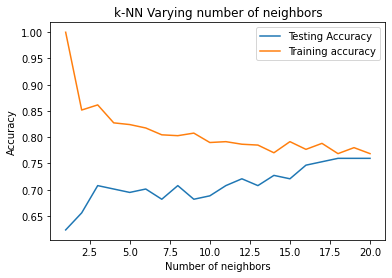

In [18]:
plt.title('k-NN Varying number of neighbors')
plt.plot(no_neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [21]:
y_pred = knn.predict(X_test)


In [22]:
acc = accuracy_score(y_test,y_pred)
acc

0.7597402597402597

In [23]:
precision_score(y_test,y_pred)

0.75

In [24]:
f1_score(y_test,y_pred)

0.5934065934065934

In [25]:
y_pred = knn.predict(X_test)

In [26]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        99
           1       0.75      0.49      0.59        55

    accuracy                           0.76       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154



In [27]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[90  9]
 [28 27]]


### 10.2. Using GridSearchCV( ) for Hyperparameter Tuning 

In [28]:
param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=10, refit=True, verbose=0)

In [29]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [30]:
knn_cv.best_score_

0.7671866737176097

In [31]:
knn_cv.best_params_

{'n_neighbors': 27}

In [32]:
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=27)

In [33]:
y_pred = knn_cv.predict(X_test)

In [34]:
acc = accuracy_score(y_test,y_pred)
acc

0.7467532467532467

In [35]:
precision_score(y_test,y_pred)

0.7

In [36]:
f1_score(y_test,y_pred)

0.5894736842105263

In [37]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        99
           1       0.70      0.51      0.59        55

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [38]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[87 12]
 [27 28]]


## 11. Use for real application model to predict the result

In [ ]:
Pregnancies = input("Enter the number of Pregnacies has before")
Glucose =  input("Enter the Blood glucose level")
BloodPressure = input("Enter the Blood Pressure")
SkinThickness = input("Enter the Skin Thikcknes")
Insulin = input("Enter the Insulin Level")
BMI = input("Enter the BMI")
DiabetesPedigreeFunction = input("Enter the Diabetes Pedigree function")
Age = input("Enter the Age")

X = [[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]]


Report = knn_cv.predict(X)

if(Report==1):
    print("Diabetes")
else:
    print("No Diabetes")
